# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [65]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

 Preprocessing

 Training

In [66]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3901 files belonging to 2 classes.


 Validation Image

In [67]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 975 files belonging to 2 classes.


## Building Model

In [68]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [69]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\Aditya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [71]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [72]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [73]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [74]:
cnn.add(tf.keras.layers.Flatten())

In [75]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [76]:
cnn.add(tf.keras.layers.Dropout(0.4)) 

In [77]:

cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [78]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         3,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,000,758 (57.22 MB)

 Trainable params: 15,000,758 (57.22 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and Training Phase

In [79]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [80]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=11)

Epoch 1/11
122/122 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7025 - loss: 0.9248 - val_accuracy: 0.8831 - val_loss: 0.2787
Epoch 2/11
122/122 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9142 - loss: 0.2280 - val_accuracy: 0.9344 - val_loss: 0.1789
Epoch 3/11
122/122 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9535 - loss: 0.1294 - val_accuracy: 0.9662 - val_loss: 0.0878
Epoch 4/11
122/122 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9828 - loss: 0.0446 - val_accuracy: 0.9836 - val_loss: 0.0569
Epoch 5/11
122/122 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9921 - loss: 0.0308 - val_accuracy: 0.9887 - val_loss: 0.0302
Epoch 6/11
122/122 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9928 - val_loss: 0.0286
Epoch 7/11
122/122 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9924 - loss: 0.0200 - val_accuracy: 0.9928 - val_loss: 0.0252
Epoch 8/11
122/122 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9984 - loss: 0.0048 - val_accu

## Evaluating Model

In [81]:

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

122/122 ━━━━━━━━━━━━━━━━━━━━ 25s 207ms/step - accuracy: 0.9987 - loss: 0.0028
Training accuracy: 0.998974621295929


In [82]:

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.9887 - loss: 0.0490
Validation accuracy: 0.9917948842048645


### Saving Model

In [83]:
cnn.save('trained_plant_disease_model_paperbell.keras')

In [84]:

import json
with open('training_hist_paperbell.json','w') as f:
  json.dump(training_history.history,f)

In [85]:
training_history.history

{'accuracy': [0.80415278673172,
  0.9261727929115295,
  0.9641117453575134,
  0.9866700768470764,
  0.9912843108177185,
  0.9964112043380737,
  0.9933350682258606,
  0.9992309808731079,
  0.999743640422821,
  0.999743640422821,
  0.9984619617462158],
 'loss': [0.4997038245201111,
  0.19924820959568024,
  0.10393388569355011,
  0.0367908775806427,
  0.02506944164633751,
  0.011205409653484821,
  0.017626533284783363,
  0.0034299055114388466,
  0.0009736183565109968,
  0.002183759119361639,
  0.005545353051275015],
 'val_accuracy': [0.8830769062042236,
  0.9343589544296265,
  0.9661538600921631,
  0.983589768409729,
  0.9887179732322693,
  0.9928205013275146,
  0.9928205013275146,
  0.9948717951774597,
  0.9907692074775696,
  0.9907692074775696,
  0.9917948842048645],
 'val_loss': [0.2786827087402344,
  0.1788807511329651,
  0.08775614202022552,
  0.05688396841287613,
  0.030191756784915924,
  0.028562672436237335,
  0.0252150259912014,
  0.027189169079065323,
  0.07103963196277618,
  0.

In [86]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


 Accuracy Visualization

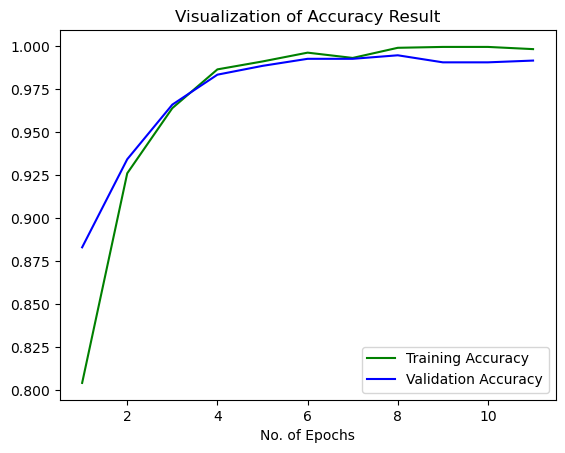

In [87]:
epochs = [i for i in range(1,12)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

other metrics for model evaluation

In [88]:
class_name = validation_set.class_names

In [89]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 975 files belonging to 2 classes.


In [90]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

975/975 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step


In [91]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [92]:
Y_true

<tf.Tensor: shape=(975,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

In [93]:
predicted_categories

<tf.Tensor: shape=(975,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

In [94]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [95]:

print(classification_report(Y_true,predicted_categories,target_names=class_name))

                               precision    recall  f1-score   support

Pepper,_bell___Bacterial_spot       1.00      0.49      0.66       975
       Pepper,_bell___healthy       0.00      0.00      0.00         0

                     accuracy                           0.49       975
                    macro avg       0.50      0.25      0.33       975
                 weighted avg       1.00      0.49      0.66       975



c:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Confusion Matrix Visualization

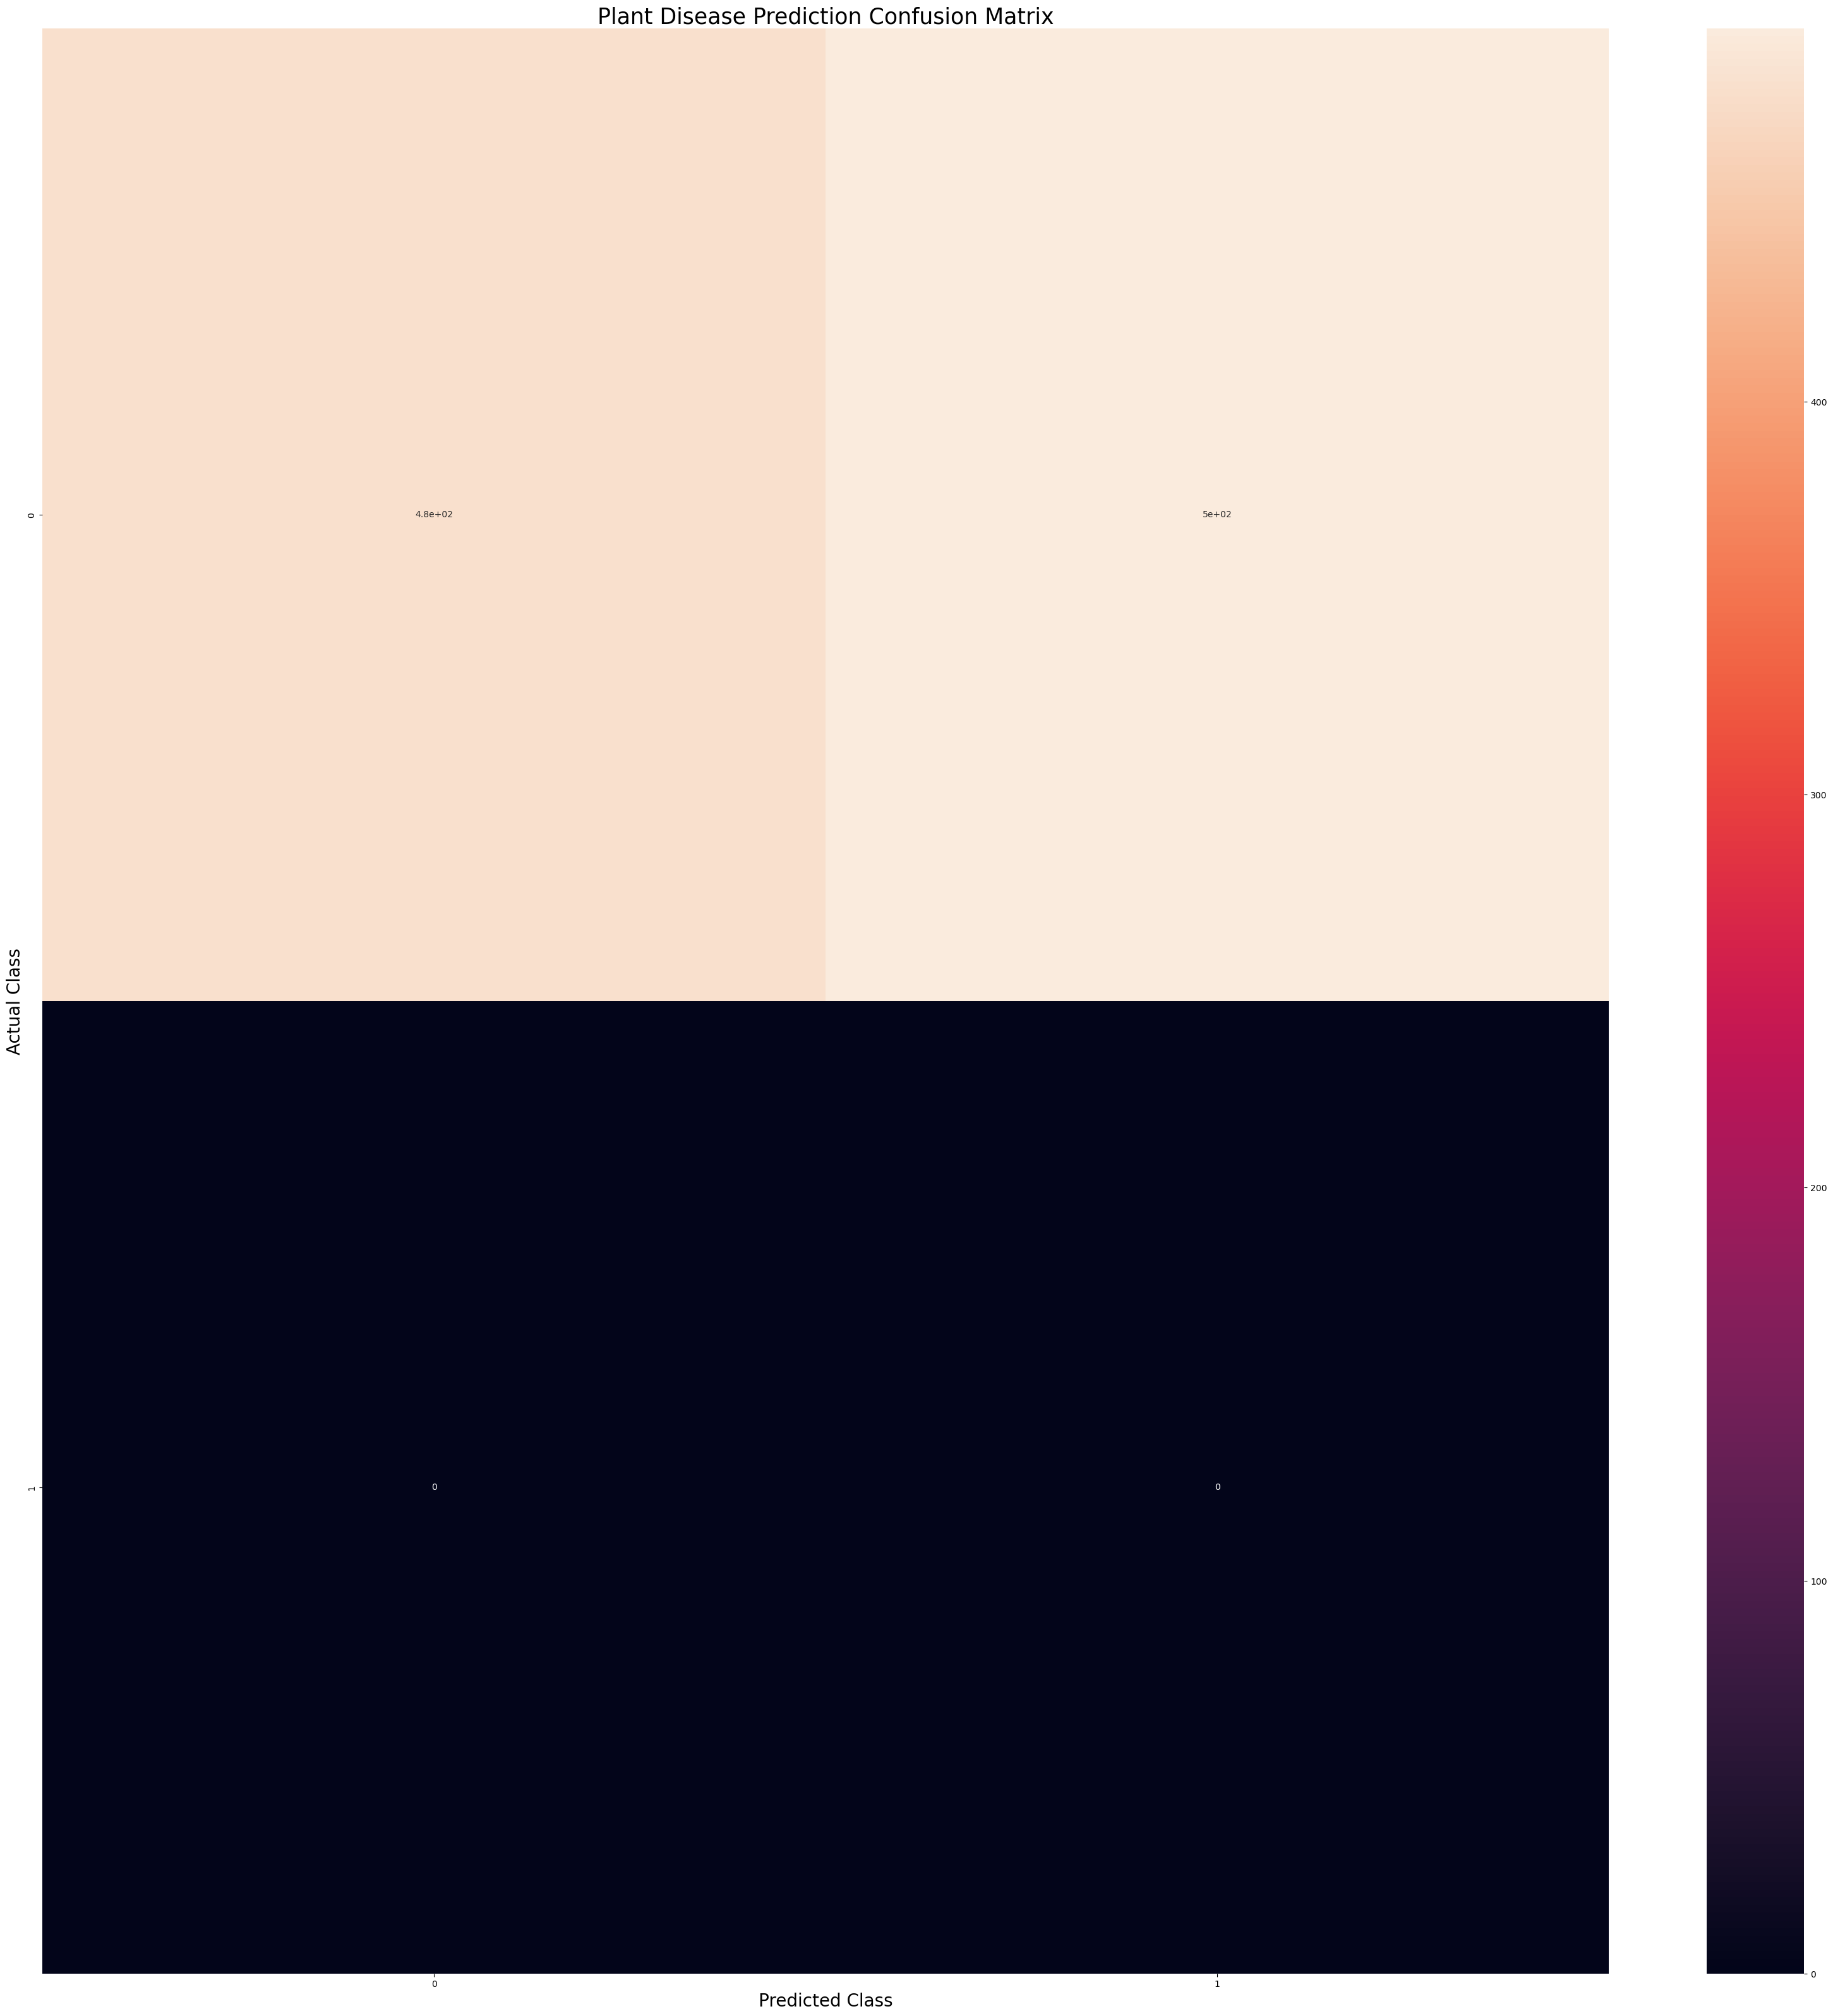

In [96]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()